# Credit Score Movement Prediction - Data Generation

In [5]:
import sys
import os

# Get the parent directory of the notebook folder
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.data_generator import DataGenerator

ModuleNotFoundError: No module named 'src'

## Generate Synthetic Dataset

In [4]:
# Initialize data generator
generator = DataGenerator()

# Generate dataset
df = generator.generate_dataset()

# Save dataset
df.to_csv('../src/data/credit_score_dataset.csv', index=False)

## Explore Generated Data

In [4]:
df=pd.read_csv('../src/data/credit_score_dataset.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print("First 5 rows:")
display(df.head())

# Target distribution
print("Target Distribution:")
display(df['target_credit_score_movement'].value_counts(normalize=True))

Dataset Shape: (25000, 17)
First 5 rows:


,customer_id,age,gender,location,monthly_income,monthly_emi_outflow,total_credit_limit,current_outstanding,credit_utilization_ratio,repayment_history_score,dpd_last_3_months,num_hard_inquiries_last_6m,months_since_last_default,num_open_loans,recent_credit_card_usage,recent_loan_disbursed_amount,target_credit_score_movement
0,CUST_00001,44,F,Rural,67745.189979,16842.741748,187970.884044,26669.848490,0.141883,81.271350,1,1,16,0,13712.080591,11740.072599,increase
1,CUST_00002,24,M,Rural,47522.194888,15174.049815,120985.280959,36758.953252,0.303830,71.362307,0,2,12,0,19060.249323,19274.952124,stable
2,CUST_00003,54,F,Suburban,70180.891422,23173.473639,169514.967348,44770.269901,0.264108,67.790116,3,1,13,4,22443.203906,20020.899240,stable
3,CUST_00004,33,F,Suburban,80519.175004,25842.029076,235844.482066,81874.869799,0.347156,62.444674,2,2,12,6,61924.565645,39981.338175,stable
4,CUST_00005,39,M,Urban,146837.944732,32631.123182,437669.802241,134093.975564,0.306382,86.637687,1,2,20,2,56560.876889,76511.499204,stable


Target Distribution:


target_credit_score_movement
stable      0.83592
increase    0.09384
decrease    0.07024
Name: proportion, dtype: float64

## Visualize Key Features

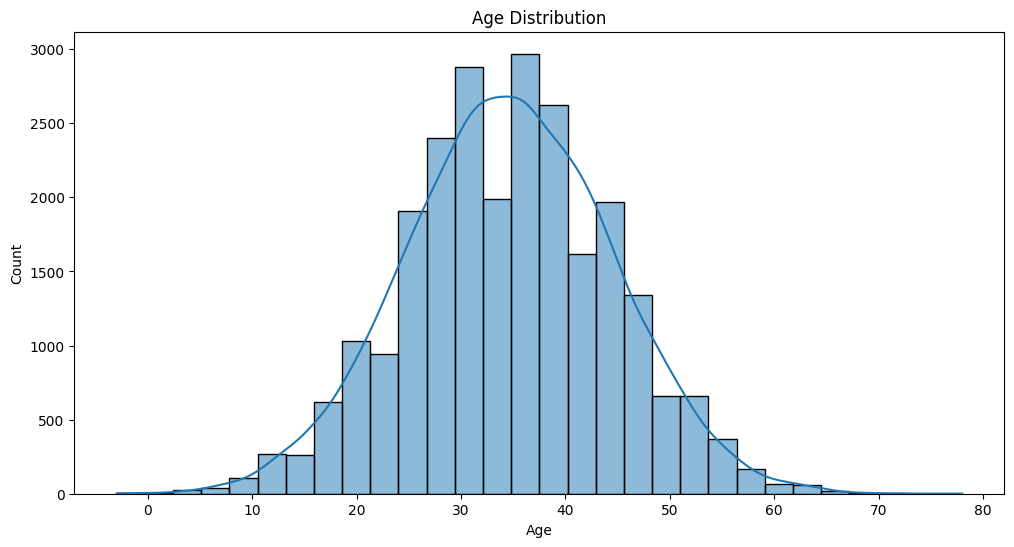

In [ ]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

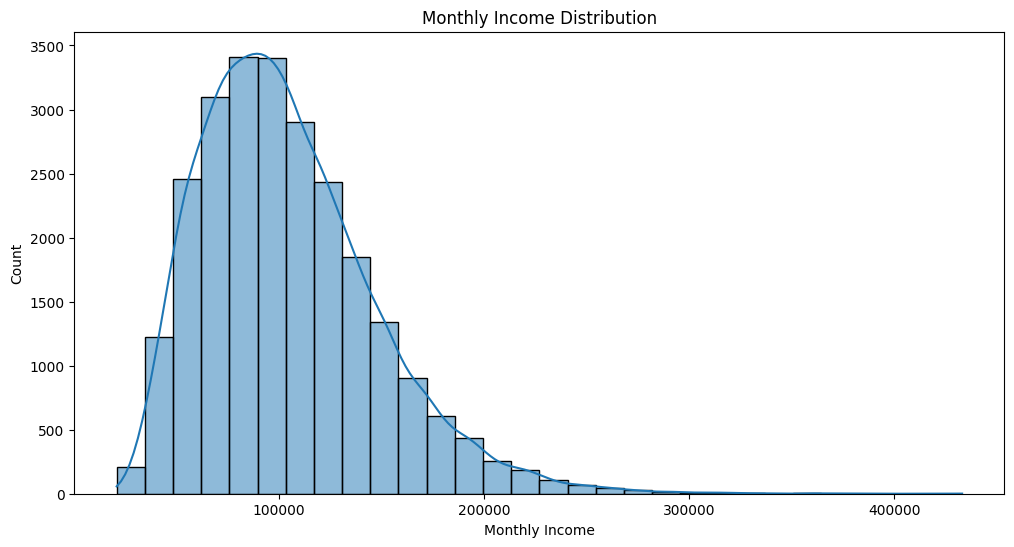

In [ ]:
# Income distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='monthly_income', bins=30, kde=True)
plt.title('Monthly Income Distribution')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

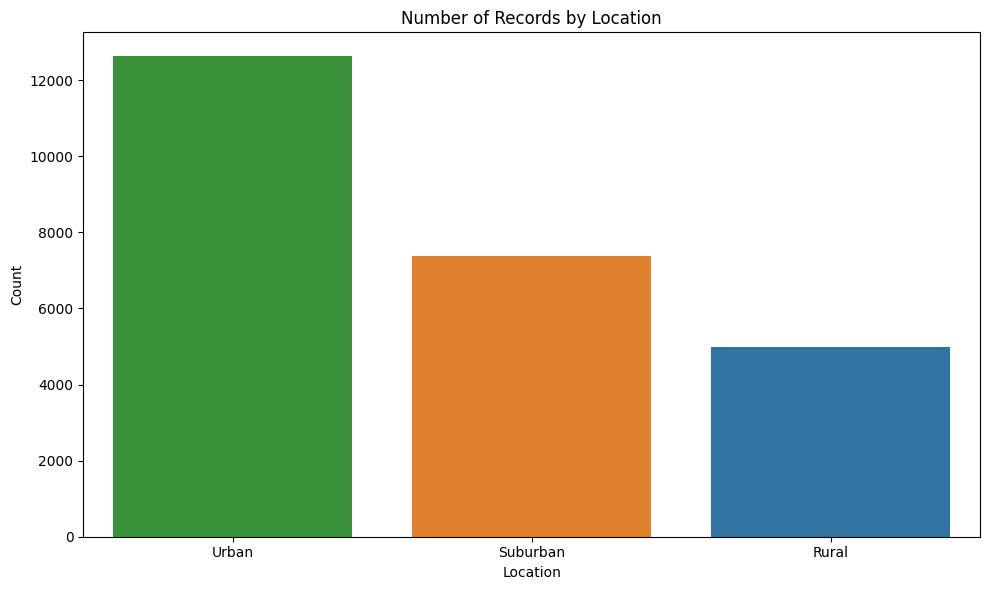

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='location', order=df['location'].value_counts().index,hue='location')
plt.title('Number of Records by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

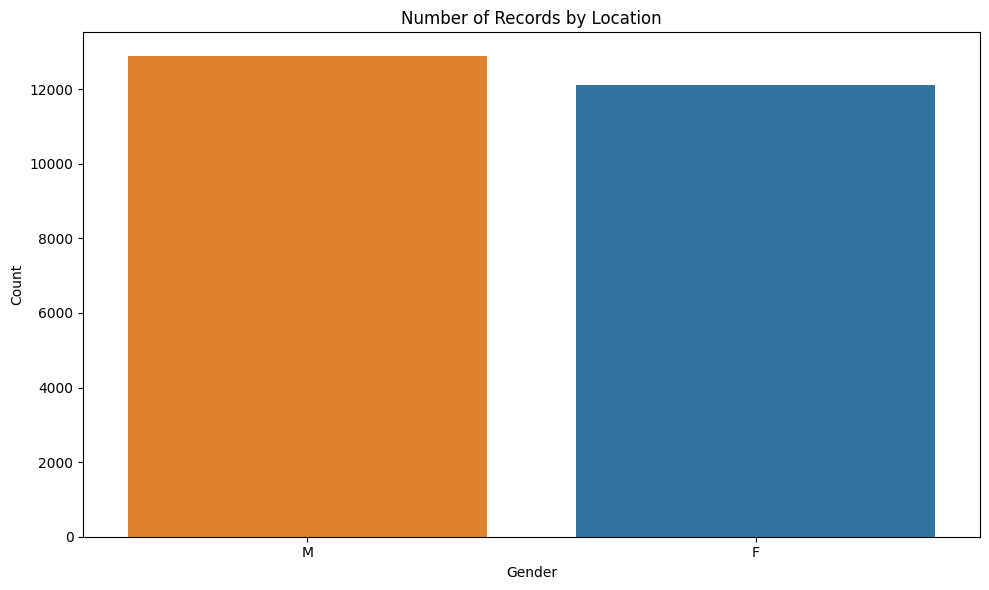

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index,hue='gender')
plt.title('Number of Records by Location')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

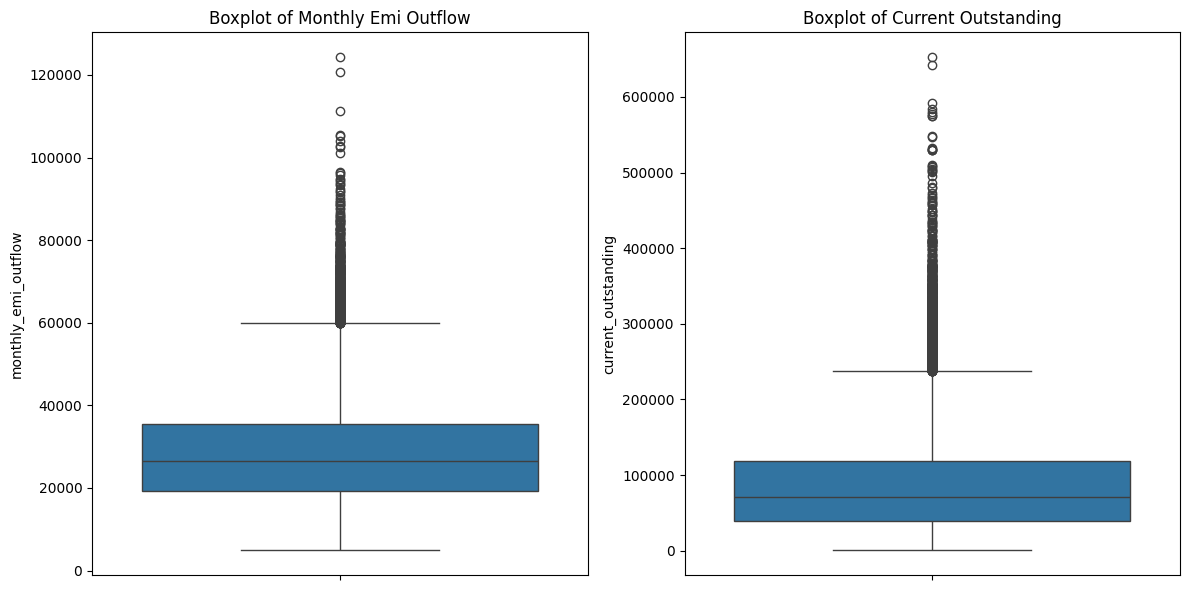

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of relevant numerical columns
cols_to_plot = ['monthly_emi_outflow', 'current_outstanding']  

plt.figure(figsize=(12, 6))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, len(cols_to_plot), i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col.replace("_", " ").title()}')

plt.tight_layout()
plt.show()


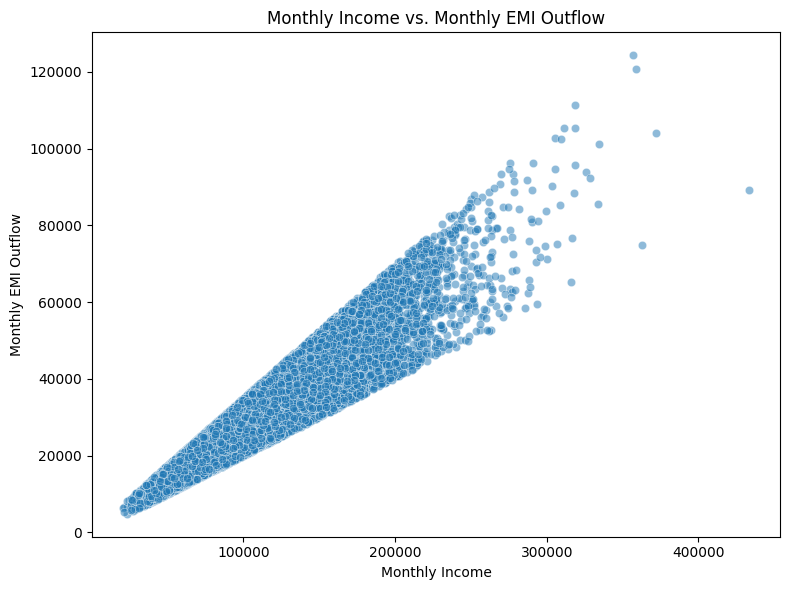

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='monthly_income', y='monthly_emi_outflow', alpha=0.5)
plt.title('Monthly Income vs. Monthly EMI Outflow')
plt.xlabel('Monthly Income')
plt.ylabel('Monthly EMI Outflow')
plt.tight_layout()
plt.show()

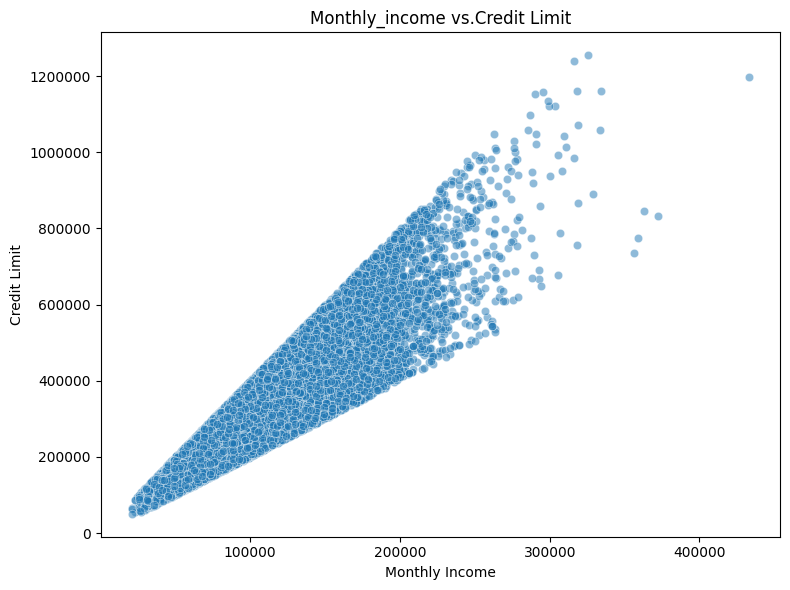

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='monthly_income', y='total_credit_limit', alpha=0.5)
plt.title('Monthly_income vs.Credit Limit')
plt.xlabel('Monthly Income')
plt.ylabel('Credit Limit')
plt.ticklabel_format(style='plain', axis='y') 

plt.tight_layout()
plt.show()


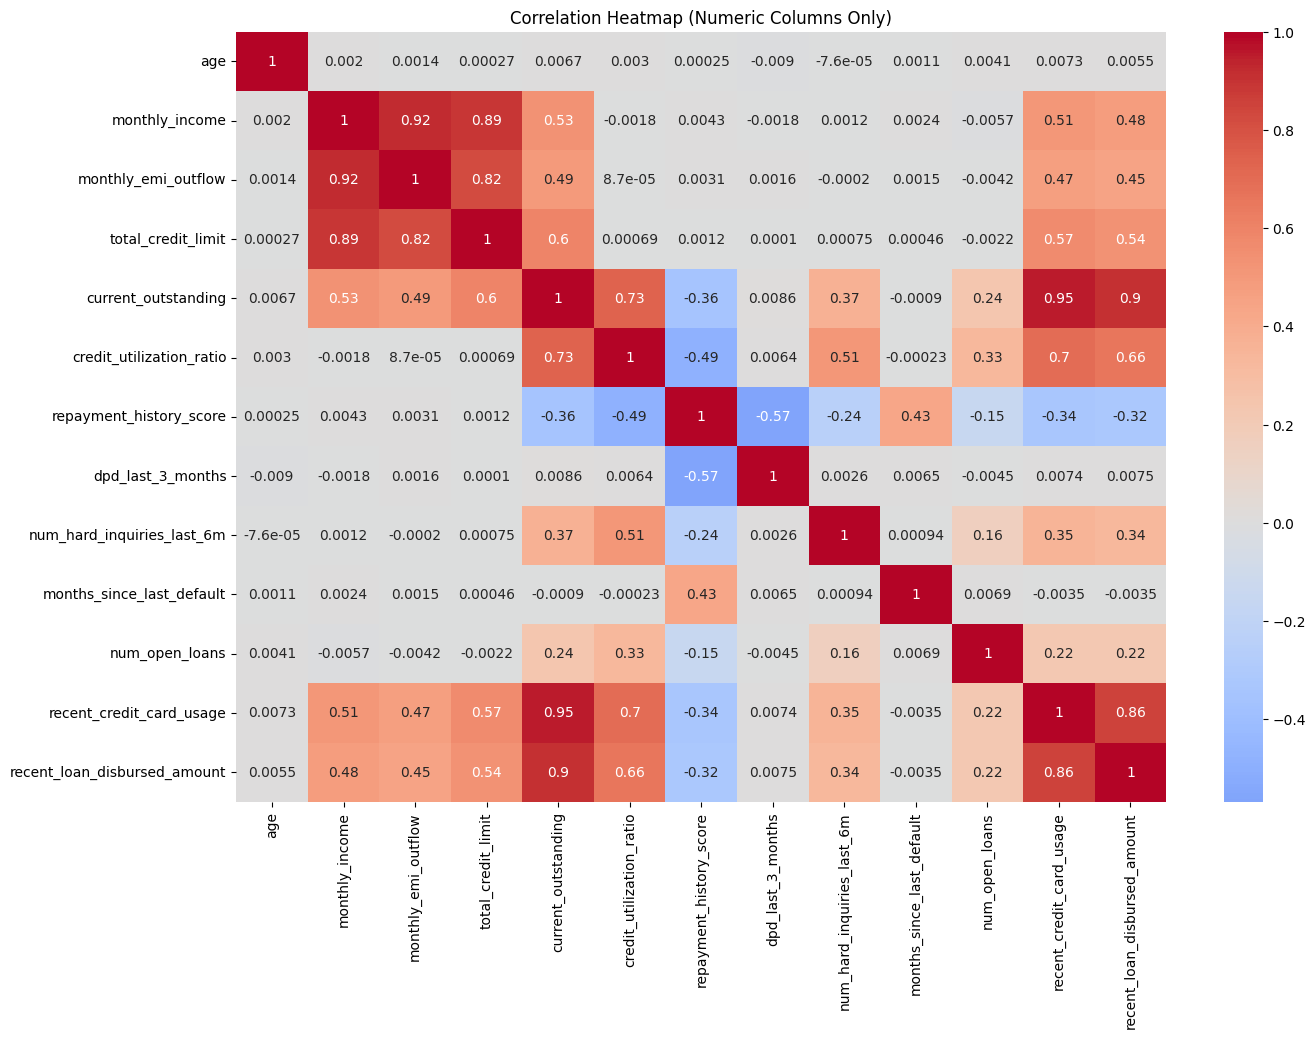

In [36]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


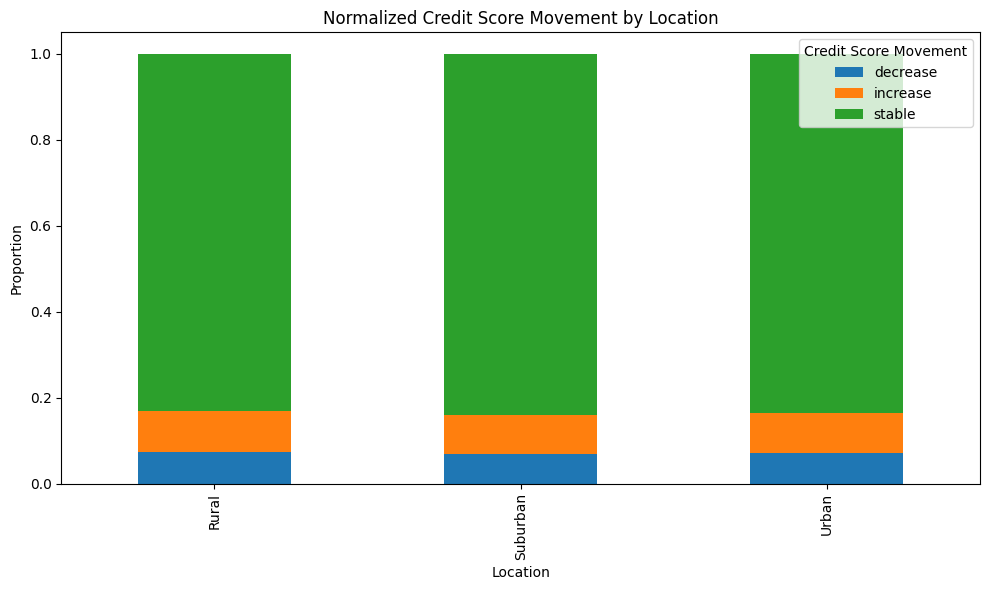

In [ ]:

location_target_pct = pd.crosstab(df['location'], df['target_credit_score_movement'], normalize='index')

location_target_pct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Normalized Credit Score Movement by Location')
plt.xlabel('Location')
plt.ylabel('Proportion')
plt.legend(title='Credit Score Movement')
plt.tight_layout()
plt.show()


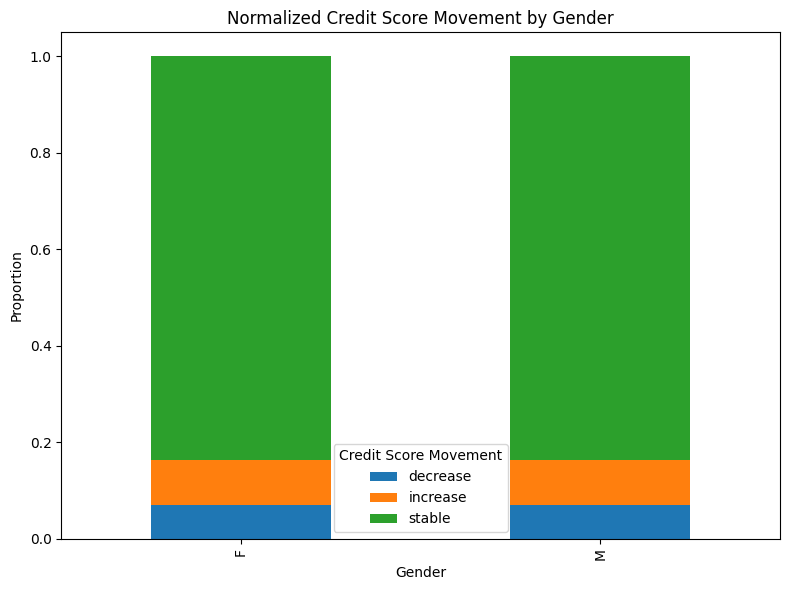

In [54]:
gender_target_pct = pd.crosstab(df['gender'], df['target_credit_score_movement'], normalize='index')

gender_target_pct.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Normalized Credit Score Movement by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Credit Score Movement')
plt.tight_layout()
plt.show()


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['dpd_last_3_months','repayment_history_score', 'credit_utilization_ratio', 'num_hard_inquiries_last_6m', 'monthly_income', 'monthly_emi_outflow', 'current_outstanding', 'total_credit_limit']
X=df[features]


In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(X_scaled)


In [61]:
label_map = {
    0: 'High Risk',
    1: 'Medium Risk',
    2: 'Low Risk'
}

In [ ]:
# Add cluster to original DataFrame
df_clusters = df.copy()
df_clusters['risk_cluster'] = df['risk_cluster'].map(label_map)

# Summary stats per cluster
cluster_summary = df_clusters.groupby('risk_cluster')[features].mean()
print(cluster_summary)



              dpd_last_3_months  repayment_history_score  \
risk_cluster                                               
High Risk              1.925261                68.371743   
Low Risk               2.494533                60.505919   
Medium Risk            1.716343                73.354822   

              credit_utilization_ratio  num_hard_inquiries_last_6m  \
risk_cluster                                                         
High Risk                     0.299136                    1.954181   
Low Risk                      0.435335                    3.097868   
Medium Risk                   0.186184                    1.231246   

              monthly_income  monthly_emi_outflow  current_outstanding  \
risk_cluster                                                             
High Risk      162236.531940         45378.447061        149433.774361   
Low Risk        88434.920737         23980.766429        113282.234143   
Medium Risk     85722.078598         23347.423963   

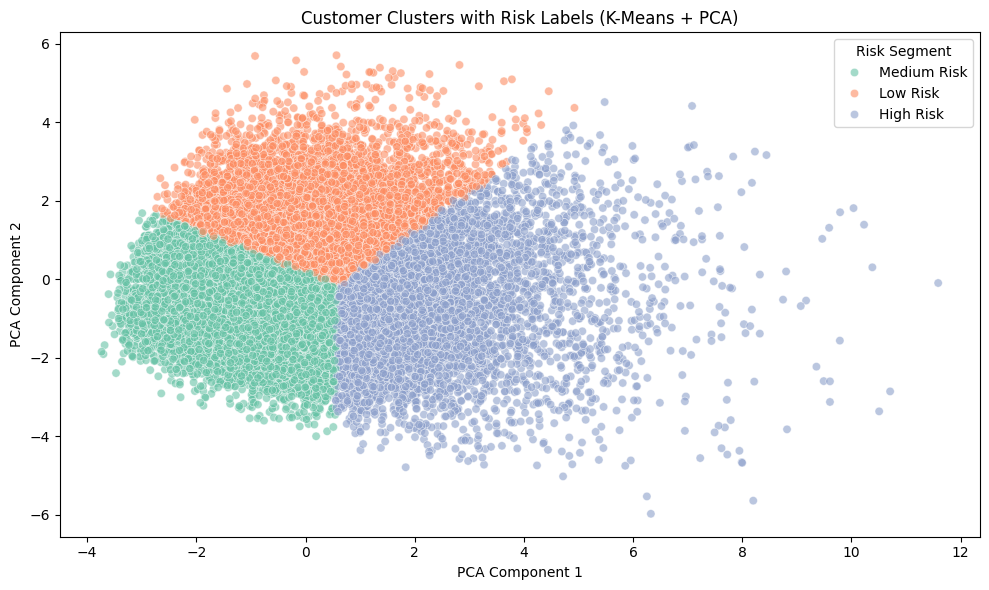

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_clusters['risk_cluster'],
    palette='Set2',
    alpha=0.6
)
plt.title('Customer Clusters with Risk Labels (K-Means + PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Risk Segment')
plt.tight_layout()
plt.show()
